# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2022W2/tree/main/lectures) 

**Due date: Monday Jan 23, 2023 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are allowed to work and submit in pairs in this homework assignment. 

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index. **Note:** you may need to change the name of the file if it does not match the download.

In [2]:
import os

spotify_df=pd.read_csv("spotify.csv", index_col=0)

print(spotify_df)

      acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechi

Excluding the target, how many columns (potential features) does the dataset include?

There are 15 columns (potential features) included in the dataset (excluding the target).

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

print(df_train.shape)
print(df_test.shape)

(1613, 16)
(404, 16)


There are 1613 training examples and 404 test examples.

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the largest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
describe_df = df_train.describe()
print(describe_df)

for column in describe_df:
    describe_df[column] = describe_df[column] / describe_df[column].abs().max()

       acousticness  danceability   duration_ms       energy  \
count   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean       0.185067      0.620076  2.462533e+05     0.681315   
std        0.255838      0.161152  8.056740e+04     0.206964   
min        0.000003      0.148000  1.604200e+04     0.015600   
25%        0.010000      0.514000  1.999040e+05     0.564000   
50%        0.062600      0.634000  2.298590e+05     0.712000   
75%        0.260000      0.739000  2.703330e+05     0.841000   
max        0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.485699   
min            0.000000     0.000000     0.018800   -31.082000     0.000000   
25%            0.000000     

In [5]:
range_df = describe_df.loc['max'] - describe_df.loc['min']
print(range_df)

acousticness        0.000616
danceability        0.000518
duration_ms         0.984032
energy              0.000608
instrumentalness    0.000605
key                 0.006820
liveness            0.000589
loudness            0.018825
mode                0.000620
speechiness         0.000371
tempo               0.106306
time_signature      0.002480
valence             0.000581
target              0.000620
dtype: float64


The feature with the largest range is duration_ms.

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of the loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [6]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

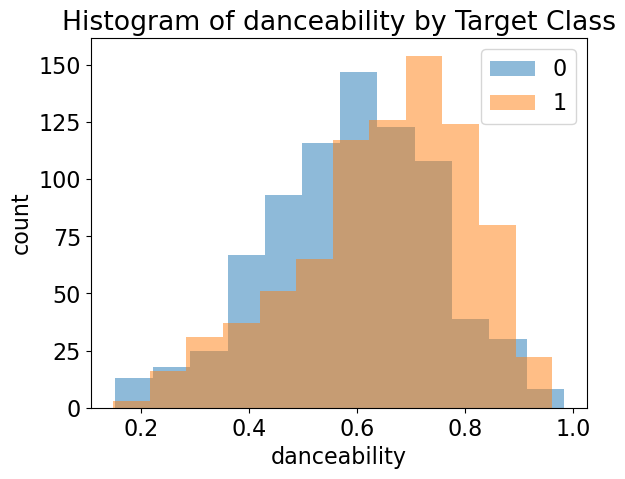

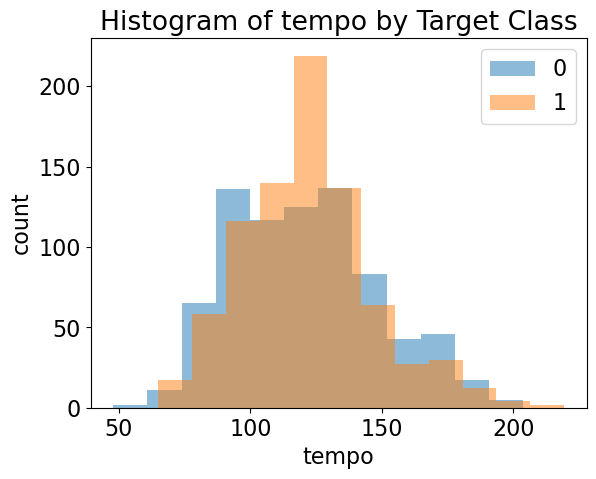

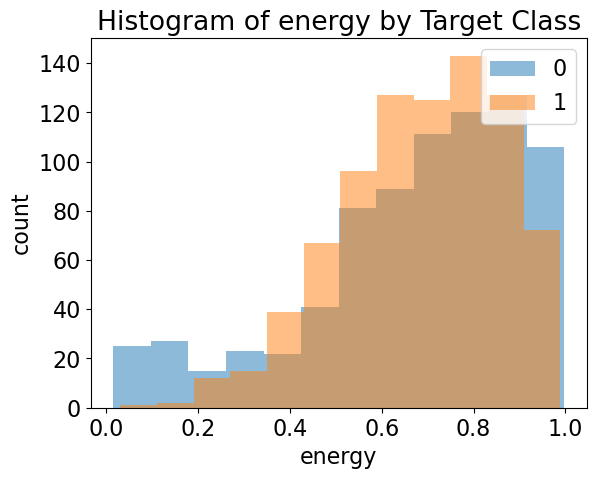

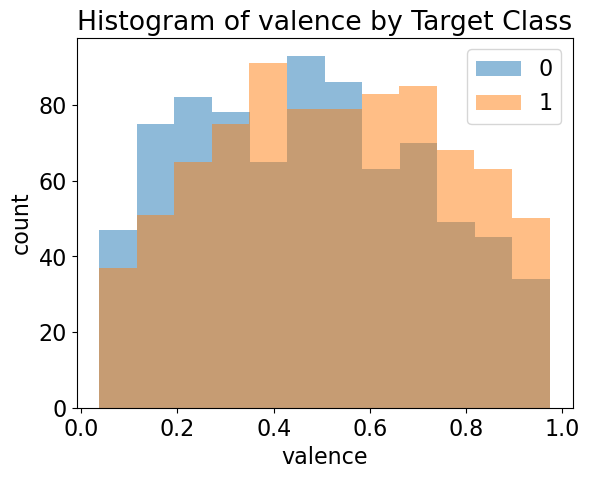

In [7]:
target_columns = ["danceability", "tempo", "energy", "valence"]

for item in target_columns:
    negative_df = negative_examples[item]
    positive_df = positive_examples[item]
    
    plt.hist(negative_df, 12, alpha=0.5, label='0')
    plt.hist(positive_df, 12, alpha=0.5, label='1')
    plt.legend(loc='upper right')
    plt.title("Histogram of " + item + " by Target Class")
    plt.xlabel(item)
    plt.ylabel("count")
    
    plt.show()




#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

Danceability - A reasonable split would be to predict 1 if danceability>0.7 (and predict 0 otherwise)

Tempo - A reasonable split would be to predict 1 if tempo>100 (and predict 0 otherwise)

Energy - A reasonable split would be to predict 1 if energy>0.3 (and predict 0 otherwise)

Valence - A reasonable split would be to predict 1 if valence>0.5 (and predict 0 otherwise)

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



Yes, if the histograms of the feature for the two target class are identical, then the feature is not useful for predicting the target class as it provides no information on how the examples are different for a clear decision.

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [8]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Yes, the `song_title` and `artist` features could be useful in predicting whether the user liked the song or not. For example, most song titles give connotation to a specific topic or genre of music and many users like songs from the same artists. There would be difficulty in using them in the model as they are text which would require extra pre-processing steps to use.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [9]:
X_train = df_train.drop(columns=["target", "song_title", "artist"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target", "song_title", "artist"])
y_test = df_test["target"]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the tenth example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the tenth example with `X_train.iloc[[9]]`.

In [10]:
y_prediction = model.predict(X_train.iloc[[9]]) 
print(y_prediction)
print(y_train[9])

[1]
1


Yes, the prediction is correct. It is [1] which matches with the corresponding class in `y_train`.

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [11]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
print(f"Average cross-validation score = {np.mean(cv_scores):.3f}")

Average cross-validation score = 0.687


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [12]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("Train score:   %0.3f" % ( np.mean(scores["train_score"])))
print("Validation score:   %0.3f" % (np.mean(scores["test_score"])))

Train score:   0.999
Validation score:   0.682


No, the cross-validation score is not exactly the same as in the previous part. They are only different by 0.5%. The score from `cross_validate` is smaller than the score from `cross_val_score`. 

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Yes, there is a significant difference between the training score and the cross-validation score. This can represent overfitting as the train score is much higher than the validation score. There is a difference of 0.999-0.679 = 0.320.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

Assuming that the sub-scores to inspect are from `cross_validate`:

In [13]:
scores['test_score'] 

array([0.67283951, 0.62962963, 0.64814815, 0.71428571, 0.73913043,
       0.59627329, 0.7515528 , 0.7515528 , 0.63975155, 0.67701863])

From inspection of the 10 sub-scores, the highest score is 0.739 and the lowest is 0.596 which is ~10% accuracy difference. This informs us that the cross validation is not completely trustworthy because of the high variance amongst the sub-scores.

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

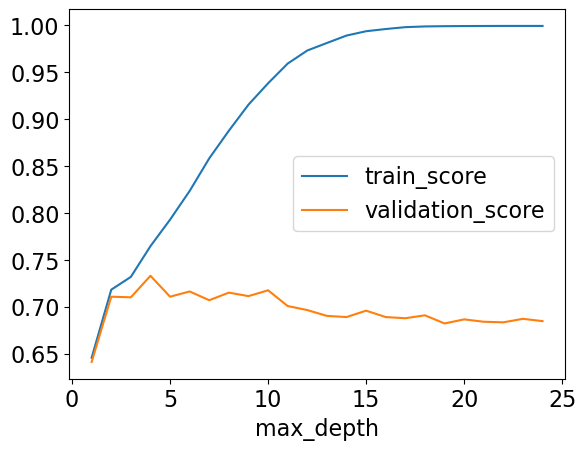

In [14]:
#Adapted from Lecture 3

results_dict = {
    "max_depth": [],
    "train_score": [],
    "validation_score": [],
}
param_grid = {"max_depth": np.arange(1, 25)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["max_depth"].append(depth)
    results_dict["validation_score"].append(np.mean(scores["test_score"]))
    results_dict["train_score"].append(np.mean(scores["train_score"]))

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("max_depth")

results_df[["train_score", "validation_score"]].plot();

In [15]:
results_df

,train_score,validation_score
max_depth,,
1,0.645519,0.641063
2,0.717986,0.710505
3,0.731625,0.709888
4,0.764345,0.732781
5,0.792589,0.710517
6,0.823174,0.716095
7,0.857892,0.706779
8,0.887304,0.714865
9,0.915064,0.711134


As the `max_depth` hyperparameter increases the `train_score` goes to 100% accuracy however the `validation_score` slowly decreases. This is as a result of overfitting the model to the training data resulting in a lack of generalization for the testing data. From this data, 4 should be selected as `max_depth` because it resulted in the highest `validation_score`. At this depth, the model should generalize well to other Spotify datasets.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [16]:
#Adapted from Lecture 3
best_depth = 4
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train, y_train)
print(f"Test score: {model.score(X_test, y_test):.3f}")

Test score: 0.693


The previous validation score was 0.732 for a `max_depth` of 4 and this one is 0.693. That is a difference of only ~4%.  

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\-1\\-1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

1. Assuming "true" = -1 and "false" = 1, with a split on the first feature (left column) being less than 5.5:
$$Pred = \begin{bmatrix}-1\\-1\\-1\\+1\\+1\\+1\end{bmatrix}$$

2. We would get 83.3% accuracy as one point would be wrongly classified (X=[10 10])
3. Yes, we can get 100% accuracy in this particular example with a single decision of the first split on the first feature (left column) being not equal to 9. This would result in the given $y$.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 